In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('train.csv'  , sep=',')
data = data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis='columns') # первый аргумент - список ненужных признаков,
                                                   # второй - поиск имен признаков по названиям колонок, а не строк
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [6]:
data['Sex']=np.where(data['Sex']=='male',1,data['Sex'])
data['Sex']=np.where(data['Sex']=='female',0,data['Sex'])
data['Sex']=data['Sex'].astype(np.int64)

data['Age']=data['Age'].fillna(data['Age'].median())
data['Age']=data['Age'].round(0)
data['Age']=data['Age'].astype(np.int64)

data['Member_Family']=data['Parch']+data['SibSp']
data['Member_Family']=np.where(data['Member_Family']>0,1,0)
data = data.drop(['Parch','SibSp'], axis='columns')
data.dtypes

Survived         int64
Pclass           int64
Sex              int64
Age              int64
Member_Family    int32
dtype: object

In [7]:
X = data[data.columns[1:]]
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


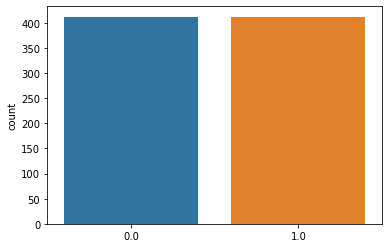

In [8]:
X_train.reset_index(inplace=True,drop=True)
y_train.reset_index(drop=True, inplace=True)

dead=X_train[y_train == 0]
isdead=dead[0:len(X_train[y_train == 0])-len(X_train[y_train == 1])]
X_train_start = pd.concat([X_train,isdead],ignore_index = True)
y_train_strat = pd.concat([y_train,pd.Series(np.ones(X_train_start.shape[0]-X_train.shape[0]))],
                          ignore_index=True)
                          
sns.countplot(y_train_strat)

In [9]:
# нормализация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_start), columns=X_train_start.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_scaled.head(2)

,Pclass,Sex,Age,Member_Family
0,0.0,0.0,0.2125,1.0
1,1.0,1.0,0.0250,1.0


In [10]:
# импорт модулей

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
# оценка recall одного дерева:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)
clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
rec_score = recall_score(y_test, predicted)
print('recall_score:', rec_score)

recall_score: 0.6976744186046512


In [12]:
import os
if os.name == 'mac':
    !xcode-select --install
    !/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
    !brew install graphviz

!pip install graphviz
if os.name == 'nt':
    os.environ['PATH'] += os.pathsep + 'C://Program Files (x86)//Graphviz2.38//bin'

!pip install pydotplus

In [13]:
# визуализация дерева

from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

feature = ['Pclass','Age','Sex','Embarked']

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=feature,
               out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\nB\x00\x00\x03\x07\x08\x06\x00\x00\x00o\x86\xd9.\x00…

Самый важный признак Age. данный узел уменьшает энтропию больше всех. Находится выше всех.

In [14]:
# оценка recall одного дерева:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
rec_score = recall_score(y_test, predicted)
print('recall_score:', rec_score)

recall_score: 0.686046511627907


In [15]:
animals_feature = ['Pclass','Age','Sex','Embarked']

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=animals_feature,
               out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x92\x00\x00\x01g\x08\x06\x00\x00\x00\x15?\xa9Q\x…

Случайный лес

In [16]:
# обычный результат 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=3).fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

recall_score_rand_forest = recall_score(y_test, predicted_rf)

print('score:', recall_score_rand_forest)

score: 0.6046511627906976


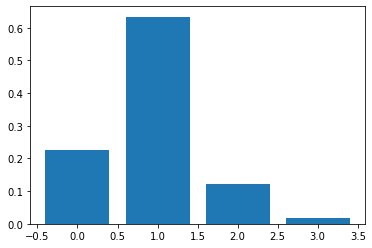

,feature,importance
1,Sex,0.633599
0,Pclass,0.226745
2,Age,0.120527
3,Member_Family,0.019129


In [17]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Выводим значения
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()
fi.head()

Самый значимый параметр - пол

In [18]:
# кросс-валидация

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=5, max_depth=5)

score_cross_val = cross_val_score(rf, X, y, cv=5, scoring='recall')
print('score:', score_cross_val)

score: [0.63768116 0.66176471 0.66176471 0.52941176 0.65217391]


In [19]:
# подберем лучшие гиперпараметры

recall_score_rand_forest_max = -1

for n_estimators_iter in range(1, 100, 10):
    for depth_iter in  range(2, 8):
        rf = RandomForestClassifier(n_estimators=n_estimators_iter, max_depth=depth_iter).fit(X_train, y_train)
        predicted_rf = rf.predict(X_test)
        recall_score_rand_forest_find = recall_score(y_test, predicted_rf)
        if recall_score_rand_forest_max < recall_score_rand_forest_find:
            recall_score_rand_forest_max = recall_score_rand_forest_find
            print(n_estimators_iter, '   ', depth_iter)  
print('recall_score_rand_forest_max:', recall_score_rand_forest_max)

1     2
11     2
recall_score_rand_forest_max: 0.7093023255813954


Сравним леса и градиентный бустинг

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier

max_score_BoostClassifier = -1

scores1 = np.ndarray([10, 10])
for i, iterations_count in enumerate(np.linspace(20, 120, 10)): 
    for j, depth in enumerate(np.arange(2, 12)):    
        model = CatBoostClassifier(n_estimators=None, max_depth=depth, iterations=int(iterations_count))
        model.fit(X_train, y_train)     
        p = model.predict(X_test)
        score = recall_score(y_test, p)
        scores1[i, j] = score
        if max_score_BoostClassifier < score:
            max_score_BoostClassifier = score
        print('score:', scores1[i, j], '\t iterations_count:', int(iterations_count), '\t depth:', depth, '\n')

print('max_score:', max_score_BoostClassifier)

Learning rate set to 0.313378
0:	learn: 0.5997414	total: 174ms	remaining: 3.31s
1:	learn: 0.5444405	total: 175ms	remaining: 1.57s
2:	learn: 0.5037422	total: 176ms	remaining: 995ms
3:	learn: 0.4857408	total: 176ms	remaining: 704ms
4:	learn: 0.4672894	total: 176ms	remaining: 529ms
5:	learn: 0.4577443	total: 177ms	remaining: 412ms
6:	learn: 0.4492697	total: 177ms	remaining: 329ms
7:	learn: 0.4465367	total: 178ms	remaining: 266ms
8:	learn: 0.4408062	total: 178ms	remaining: 218ms
9:	learn: 0.4377833	total: 178ms	remaining: 178ms
10:	learn: 0.4347772	total: 179ms	remaining: 146ms
11:	learn: 0.4328100	total: 179ms	remaining: 120ms
12:	learn: 0.4308780	total: 180ms	remaining: 96.8ms
13:	learn: 0.4296491	total: 180ms	remaining: 77.2ms
14:	learn: 0.4289929	total: 181ms	remaining: 60.2ms
15:	learn: 0.4262498	total: 181ms	remaining: 45.2ms
16:	learn: 0.4252657	total: 181ms	remaining: 32ms
17:	learn: 0.4238234	total: 182ms	remaining: 20.2ms
18:	learn: 0.4226548	total: 182ms	remaining: 9.58ms
19:	le

Learning rate set to 0.313378
0:	learn: 0.5915206	total: 1.79ms	remaining: 33.9ms
1:	learn: 0.5290983	total: 2.83ms	remaining: 25.4ms
2:	learn: 0.4887096	total: 4.14ms	remaining: 23.4ms
3:	learn: 0.4648816	total: 6.4ms	remaining: 25.6ms
4:	learn: 0.4489191	total: 7.65ms	remaining: 22.9ms
5:	learn: 0.4360108	total: 15.3ms	remaining: 35.7ms
6:	learn: 0.4281948	total: 17ms	remaining: 31.5ms
7:	learn: 0.4212857	total: 18.6ms	remaining: 27.9ms
8:	learn: 0.4180869	total: 19.8ms	remaining: 24.2ms
9:	learn: 0.4129784	total: 22.7ms	remaining: 22.7ms
10:	learn: 0.4077164	total: 25.4ms	remaining: 20.8ms
11:	learn: 0.4064886	total: 26.1ms	remaining: 17.4ms
12:	learn: 0.4039076	total: 27.5ms	remaining: 14.8ms
13:	learn: 0.4012507	total: 28.9ms	remaining: 12.4ms
14:	learn: 0.3989245	total: 30.3ms	remaining: 10.1ms
15:	learn: 0.3983938	total: 30.8ms	remaining: 7.71ms
16:	learn: 0.3957971	total: 34.9ms	remaining: 6.15ms
17:	learn: 0.3918995	total: 38.5ms	remaining: 4.28ms
18:	learn: 0.3904392	total: 3

Learning rate set to 0.209669
0:	learn: 0.6215887	total: 739us	remaining: 22.2ms
1:	learn: 0.5691441	total: 1.16ms	remaining: 16.9ms
2:	learn: 0.5293768	total: 1.71ms	remaining: 16ms
3:	learn: 0.5032883	total: 2.39ms	remaining: 16.1ms
4:	learn: 0.4856855	total: 3.16ms	remaining: 16.4ms
5:	learn: 0.4701598	total: 3.84ms	remaining: 16ms
6:	learn: 0.4577750	total: 4.59ms	remaining: 15.8ms
7:	learn: 0.4484000	total: 5.22ms	remaining: 15ms
8:	learn: 0.4410246	total: 5.67ms	remaining: 13.9ms
9:	learn: 0.4329145	total: 6.26ms	remaining: 13.1ms
10:	learn: 0.4273386	total: 6.96ms	remaining: 12.7ms
11:	learn: 0.4240386	total: 7.56ms	remaining: 12ms
12:	learn: 0.4202806	total: 8.28ms	remaining: 11.5ms
13:	learn: 0.4172555	total: 9.03ms	remaining: 11ms
14:	learn: 0.4141573	total: 9.66ms	remaining: 10.3ms
15:	learn: 0.4116653	total: 10.4ms	remaining: 9.74ms
16:	learn: 0.4091228	total: 11.1ms	remaining: 9.18ms
17:	learn: 0.4070917	total: 11.9ms	remaining: 8.59ms
18:	learn: 0.4055430	total: 12.7ms	re

score: 0.6046511627906976 	 iterations_count: 31 	 depth: 11 

Learning rate set to 0.158706
0:	learn: 0.6417685	total: 479us	remaining: 19.7ms
1:	learn: 0.6017266	total: 875us	remaining: 17.5ms
2:	learn: 0.5668830	total: 1.29ms	remaining: 16.7ms
3:	learn: 0.5440090	total: 1.68ms	remaining: 16ms
4:	learn: 0.5296574	total: 2.08ms	remaining: 15.4ms
5:	learn: 0.5116855	total: 2.5ms	remaining: 15ms
6:	learn: 0.4977542	total: 2.9ms	remaining: 14.5ms
7:	learn: 0.4902201	total: 3.3ms	remaining: 14ms
8:	learn: 0.4809922	total: 3.7ms	remaining: 13.6ms
9:	learn: 0.4726638	total: 4.11ms	remaining: 13.1ms
10:	learn: 0.4661410	total: 4.5ms	remaining: 12.7ms
11:	learn: 0.4614168	total: 4.9ms	remaining: 12.3ms
12:	learn: 0.4593477	total: 5.33ms	remaining: 11.9ms
13:	learn: 0.4558618	total: 5.74ms	remaining: 11.5ms
14:	learn: 0.4526028	total: 6.14ms	remaining: 11ms
15:	learn: 0.4498877	total: 6.54ms	remaining: 10.6ms
16:	learn: 0.4482122	total: 6.95ms	remaining: 10.2ms
17:	learn: 0.4464568	total: 7.34

24:	learn: 0.4090461	total: 16.4ms	remaining: 11.1ms
25:	learn: 0.4085688	total: 16.9ms	remaining: 10.4ms
26:	learn: 0.4073136	total: 17.6ms	remaining: 9.76ms
27:	learn: 0.4068376	total: 18.1ms	remaining: 9.04ms
28:	learn: 0.4053317	total: 18.8ms	remaining: 8.4ms
29:	learn: 0.4043463	total: 19.5ms	remaining: 7.81ms
30:	learn: 0.4023495	total: 20.2ms	remaining: 7.18ms
31:	learn: 0.4016057	total: 20.8ms	remaining: 6.51ms
32:	learn: 0.4008102	total: 21.6ms	remaining: 5.88ms
33:	learn: 0.4004118	total: 22.1ms	remaining: 5.19ms
34:	learn: 0.3995881	total: 22.8ms	remaining: 4.56ms
35:	learn: 0.3993852	total: 23.4ms	remaining: 3.9ms
36:	learn: 0.3983290	total: 24.1ms	remaining: 3.26ms
37:	learn: 0.3965743	total: 24.9ms	remaining: 2.62ms
38:	learn: 0.3950942	total: 25.6ms	remaining: 1.97ms
39:	learn: 0.3940354	total: 26.4ms	remaining: 1.32ms
40:	learn: 0.3935938	total: 27.1ms	remaining: 660us
41:	learn: 0.3935509	total: 27.5ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 42 	 d

37:	learn: 0.3896978	total: 38.3ms	remaining: 4.03ms
38:	learn: 0.3883655	total: 40.1ms	remaining: 3.08ms
39:	learn: 0.3878028	total: 41.8ms	remaining: 2.09ms
40:	learn: 0.3870350	total: 43.5ms	remaining: 1.06ms
41:	learn: 0.3868379	total: 44.1ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 42 	 depth: 10 

Learning rate set to 0.158706
0:	learn: 0.6376449	total: 685us	remaining: 28.1ms
1:	learn: 0.5933254	total: 1.2ms	remaining: 24ms
2:	learn: 0.5601473	total: 1.7ms	remaining: 22.2ms
3:	learn: 0.5369747	total: 2.24ms	remaining: 21.3ms
4:	learn: 0.5139763	total: 2.83ms	remaining: 21ms
5:	learn: 0.4952265	total: 3.72ms	remaining: 22.3ms
6:	learn: 0.4862310	total: 4.09ms	remaining: 20.5ms
7:	learn: 0.4730407	total: 4.57ms	remaining: 19.4ms
8:	learn: 0.4626206	total: 5.14ms	remaining: 18.9ms
9:	learn: 0.4529303	total: 6ms	remaining: 19.2ms
10:	learn: 0.4474089	total: 6.43ms	remaining: 18.1ms
11:	learn: 0.4436750	total: 6.86ms	remaining: 17.2ms
12:	learn: 0.4387587	total: 7

0:	learn: 0.6476584	total: 640us	remaining: 33.3ms
1:	learn: 0.6111986	total: 1.22ms	remaining: 31.2ms
2:	learn: 0.5812307	total: 1.74ms	remaining: 29.1ms
3:	learn: 0.5535552	total: 2.19ms	remaining: 26.8ms
4:	learn: 0.5327446	total: 2.75ms	remaining: 26.4ms
5:	learn: 0.5179925	total: 3.36ms	remaining: 26.3ms
6:	learn: 0.5071700	total: 3.76ms	remaining: 24.7ms
7:	learn: 0.4986260	total: 4.17ms	remaining: 23.5ms
8:	learn: 0.4875487	total: 4.69ms	remaining: 22.9ms
9:	learn: 0.4764826	total: 5.28ms	remaining: 22.7ms
10:	learn: 0.4662553	total: 5.81ms	remaining: 22.2ms
11:	learn: 0.4578523	total: 6.36ms	remaining: 21.7ms
12:	learn: 0.4513161	total: 6.91ms	remaining: 21.2ms
13:	learn: 0.4456897	total: 7.44ms	remaining: 20.7ms
14:	learn: 0.4410776	total: 7.98ms	remaining: 20.2ms
15:	learn: 0.4374874	total: 8.42ms	remaining: 19.5ms
16:	learn: 0.4334808	total: 8.97ms	remaining: 19ms
17:	learn: 0.4309254	total: 9.51ms	remaining: 18.5ms
18:	learn: 0.4282318	total: 10ms	remaining: 17.9ms
19:	lear

46:	learn: 0.3956166	total: 33.3ms	remaining: 4.25ms
47:	learn: 0.3953086	total: 34.3ms	remaining: 3.57ms
48:	learn: 0.3952677	total: 34.7ms	remaining: 2.83ms
49:	learn: 0.3950039	total: 35.2ms	remaining: 2.11ms
50:	learn: 0.3945869	total: 36ms	remaining: 1.41ms
51:	learn: 0.3939149	total: 36.8ms	remaining: 708us
52:	learn: 0.3936187	total: 37.4ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 53 	 depth: 7 

Learning rate set to 0.128219
0:	learn: 0.6476584	total: 850us	remaining: 44.2ms
1:	learn: 0.6094367	total: 1.38ms	remaining: 35.1ms
2:	learn: 0.5792171	total: 1.86ms	remaining: 31.1ms
3:	learn: 0.5571227	total: 2.39ms	remaining: 29.3ms
4:	learn: 0.5347628	total: 2.88ms	remaining: 27.6ms
5:	learn: 0.5160755	total: 3.94ms	remaining: 30.9ms
6:	learn: 0.5059051	total: 4.35ms	remaining: 28.6ms
7:	learn: 0.4918478	total: 4.9ms	remaining: 27.6ms
8:	learn: 0.4804567	total: 5.53ms	remaining: 27ms
9:	learn: 0.4709155	total: 6.25ms	remaining: 26.9ms
10:	learn: 0.4627011	total:

score: 0.6046511627906976 	 iterations_count: 53 	 depth: 10 

Learning rate set to 0.128219
0:	learn: 0.6476584	total: 627us	remaining: 32.7ms
1:	learn: 0.6094367	total: 1.08ms	remaining: 27.6ms
2:	learn: 0.5792171	total: 1.55ms	remaining: 25.9ms
3:	learn: 0.5571227	total: 2.1ms	remaining: 25.8ms
4:	learn: 0.5347628	total: 2.6ms	remaining: 24.9ms
5:	learn: 0.5160755	total: 3.46ms	remaining: 27.1ms
6:	learn: 0.5059051	total: 3.78ms	remaining: 24.9ms
7:	learn: 0.4918478	total: 4.31ms	remaining: 24.3ms
8:	learn: 0.4804567	total: 4.87ms	remaining: 23.8ms
9:	learn: 0.4709155	total: 5.53ms	remaining: 23.8ms
10:	learn: 0.4627011	total: 6ms	remaining: 22.9ms
11:	learn: 0.4574975	total: 6.41ms	remaining: 21.9ms
12:	learn: 0.4506005	total: 7.06ms	remaining: 21.7ms
13:	learn: 0.4449930	total: 8.23ms	remaining: 22.9ms
14:	learn: 0.4403148	total: 11.2ms	remaining: 28.5ms
15:	learn: 0.4362313	total: 12.5ms	remaining: 28.9ms
16:	learn: 0.4321960	total: 15.5ms	remaining: 32.8ms
17:	learn: 0.4286664	t

5:	learn: 0.5352646	total: 3.75ms	remaining: 36.3ms
6:	learn: 0.5240193	total: 4.19ms	remaining: 34.1ms
7:	learn: 0.5147916	total: 4.6ms	remaining: 32.2ms
8:	learn: 0.5033452	total: 5.14ms	remaining: 31.4ms
9:	learn: 0.4918871	total: 5.68ms	remaining: 30.7ms
10:	learn: 0.4813199	total: 6.22ms	remaining: 30ms
11:	learn: 0.4721725	total: 6.73ms	remaining: 29.2ms
12:	learn: 0.4649462	total: 7.26ms	remaining: 28.5ms
13:	learn: 0.4586104	total: 7.76ms	remaining: 27.7ms
14:	learn: 0.4532882	total: 8.27ms	remaining: 27ms
15:	learn: 0.4489747	total: 8.8ms	remaining: 26.4ms
16:	learn: 0.4442056	total: 9.32ms	remaining: 25.8ms
17:	learn: 0.4409816	total: 9.84ms	remaining: 25.1ms
18:	learn: 0.4382222	total: 10.4ms	remaining: 24.6ms
19:	learn: 0.4362697	total: 10.8ms	remaining: 23.7ms
20:	learn: 0.4331702	total: 11.3ms	remaining: 23.1ms
21:	learn: 0.4310926	total: 11.8ms	remaining: 22.6ms
22:	learn: 0.4294967	total: 12.4ms	remaining: 22.1ms
23:	learn: 0.4269399	total: 13ms	remaining: 21.7ms
24:	le

1:	learn: 0.6209413	total: 1.66ms	remaining: 51.3ms
2:	learn: 0.5934029	total: 2.16ms	remaining: 43.9ms
3:	learn: 0.5711057	total: 2.82ms	remaining: 42.4ms
4:	learn: 0.5536146	total: 3.29ms	remaining: 38.8ms
5:	learn: 0.5347511	total: 4.18ms	remaining: 40.4ms
6:	learn: 0.5235695	total: 4.63ms	remaining: 37.7ms
7:	learn: 0.5090723	total: 5.16ms	remaining: 36.1ms
8:	learn: 0.4971465	total: 5.76ms	remaining: 35.2ms
9:	learn: 0.4869994	total: 6.53ms	remaining: 35.3ms
10:	learn: 0.4778581	total: 7.05ms	remaining: 34ms
11:	learn: 0.4699707	total: 7.8ms	remaining: 33.8ms
12:	learn: 0.4626256	total: 8.49ms	remaining: 33.3ms
13:	learn: 0.4570084	total: 9.44ms	remaining: 33.7ms
14:	learn: 0.4519335	total: 10.3ms	remaining: 33.8ms
15:	learn: 0.4472670	total: 11.1ms	remaining: 33.2ms
16:	learn: 0.4436868	total: 11.7ms	remaining: 32.3ms
17:	learn: 0.4396121	total: 12.6ms	remaining: 32.1ms
18:	learn: 0.4358057	total: 13.5ms	remaining: 32ms
19:	learn: 0.4322396	total: 14.1ms	remaining: 31ms
20:	learn

Learning rate set to 0.107857
0:	learn: 0.6545175	total: 633us	remaining: 39.9ms
1:	learn: 0.6209413	total: 1.11ms	remaining: 34.3ms
2:	learn: 0.5934029	total: 1.54ms	remaining: 31.2ms
3:	learn: 0.5711057	total: 2.18ms	remaining: 32.8ms
4:	learn: 0.5536146	total: 2.65ms	remaining: 31.2ms
5:	learn: 0.5347511	total: 3.43ms	remaining: 33.2ms
6:	learn: 0.5235695	total: 3.98ms	remaining: 32.4ms
7:	learn: 0.5090723	total: 4.54ms	remaining: 31.8ms
8:	learn: 0.4971465	total: 5.11ms	remaining: 31.2ms
9:	learn: 0.4869994	total: 5.81ms	remaining: 31.4ms
10:	learn: 0.4778581	total: 6.3ms	remaining: 30.4ms
11:	learn: 0.4699707	total: 6.96ms	remaining: 30.2ms
12:	learn: 0.4626256	total: 7.64ms	remaining: 30ms
13:	learn: 0.4572811	total: 10.9ms	remaining: 39ms
14:	learn: 0.4526938	total: 11.5ms	remaining: 37.5ms
15:	learn: 0.4491620	total: 11.9ms	remaining: 35.7ms
16:	learn: 0.4455036	total: 12.4ms	remaining: 34.3ms
17:	learn: 0.4409995	total: 13ms	remaining: 33.1ms
18:	learn: 0.4376070	total: 13.8ms

Learning rate set to 0.093257
0:	learn: 0.6579407	total: 604us	remaining: 44.7ms
1:	learn: 0.6322958	total: 1.11ms	remaining: 40.7ms
2:	learn: 0.6071684	total: 1.61ms	remaining: 38.6ms
3:	learn: 0.5857642	total: 2.13ms	remaining: 37.7ms
4:	learn: 0.5647511	total: 2.53ms	remaining: 35.4ms
5:	learn: 0.5490498	total: 3.02ms	remaining: 34.7ms
6:	learn: 0.5341483	total: 3.47ms	remaining: 33.7ms
7:	learn: 0.5222926	total: 3.96ms	remaining: 33.2ms
8:	learn: 0.5145082	total: 4.35ms	remaining: 31.9ms
9:	learn: 0.5031673	total: 4.8ms	remaining: 31.2ms
10:	learn: 0.4936008	total: 5.25ms	remaining: 30.5ms
11:	learn: 0.4875839	total: 5.68ms	remaining: 29.8ms
12:	learn: 0.4795463	total: 6.11ms	remaining: 29.2ms
13:	learn: 0.4726134	total: 6.56ms	remaining: 28.6ms
14:	learn: 0.4696558	total: 6.95ms	remaining: 27.8ms
15:	learn: 0.4643276	total: 7.41ms	remaining: 27.3ms
16:	learn: 0.4594060	total: 7.9ms	remaining: 26.9ms
17:	learn: 0.4552165	total: 8.28ms	remaining: 26.2ms
18:	learn: 0.4513132	total: 8

10:	learn: 0.4890257	total: 7.31ms	remaining: 42.5ms
11:	learn: 0.4808524	total: 7.97ms	remaining: 41.8ms
12:	learn: 0.4729908	total: 8.58ms	remaining: 40.9ms
13:	learn: 0.4672402	total: 9.23ms	remaining: 40.2ms
14:	learn: 0.4617812	total: 9.88ms	remaining: 39.5ms
15:	learn: 0.4567549	total: 10.5ms	remaining: 38.7ms
16:	learn: 0.4527298	total: 11.1ms	remaining: 37.9ms
17:	learn: 0.4492397	total: 11.7ms	remaining: 37.2ms
18:	learn: 0.4453691	total: 12.3ms	remaining: 36.4ms
19:	learn: 0.4417531	total: 13ms	remaining: 35.8ms
20:	learn: 0.4383453	total: 13.7ms	remaining: 35.2ms
21:	learn: 0.4354144	total: 14.2ms	remaining: 34.3ms
22:	learn: 0.4323629	total: 14.9ms	remaining: 33.7ms
23:	learn: 0.4305969	total: 15.4ms	remaining: 32.6ms
24:	learn: 0.4284221	total: 15.9ms	remaining: 31.8ms
25:	learn: 0.4263087	total: 16.5ms	remaining: 31.1ms
26:	learn: 0.4254821	total: 16.9ms	remaining: 30ms
27:	learn: 0.4244863	total: 17.5ms	remaining: 29.4ms
28:	learn: 0.4227403	total: 18.1ms	remaining: 28.8

0:	learn: 0.6595202	total: 1.45ms	remaining: 108ms
1:	learn: 0.6295764	total: 1.9ms	remaining: 69.3ms
2:	learn: 0.6043600	total: 2.34ms	remaining: 56.2ms
3:	learn: 0.5835358	total: 2.94ms	remaining: 52.1ms
4:	learn: 0.5667336	total: 3.37ms	remaining: 47.2ms
5:	learn: 0.5486224	total: 4.08ms	remaining: 46.9ms
6:	learn: 0.5373727	total: 4.53ms	remaining: 44ms
7:	learn: 0.5229727	total: 5.04ms	remaining: 42.2ms
8:	learn: 0.5109430	total: 5.63ms	remaining: 41.3ms
9:	learn: 0.5005504	total: 6.35ms	remaining: 41.3ms
10:	learn: 0.4909419	total: 6.85ms	remaining: 39.9ms
11:	learn: 0.4826552	total: 7.56ms	remaining: 39.7ms
12:	learn: 0.4761879	total: 8.2ms	remaining: 39.1ms
13:	learn: 0.4692094	total: 8.64ms	remaining: 37.7ms
14:	learn: 0.4636559	total: 9.4ms	remaining: 37.6ms
15:	learn: 0.4591687	total: 10.1ms	remaining: 37.1ms
16:	learn: 0.4557075	total: 10.5ms	remaining: 35.9ms
17:	learn: 0.4520005	total: 11ms	remaining: 34.9ms
18:	learn: 0.4475544	total: 11.6ms	remaining: 34.2ms
19:	learn: 

score: 0.6046511627906976 	 iterations_count: 75 	 depth: 10 

Learning rate set to 0.093257
0:	learn: 0.6595202	total: 645us	remaining: 47.8ms
1:	learn: 0.6295764	total: 1.13ms	remaining: 41.4ms
2:	learn: 0.6043600	total: 1.61ms	remaining: 38.6ms
3:	learn: 0.5835358	total: 2.22ms	remaining: 39.4ms
4:	learn: 0.5667336	total: 2.67ms	remaining: 37.3ms
5:	learn: 0.5486224	total: 3.42ms	remaining: 39.3ms
6:	learn: 0.5373727	total: 3.86ms	remaining: 37.5ms
7:	learn: 0.5229727	total: 4.36ms	remaining: 36.5ms
8:	learn: 0.5109430	total: 4.95ms	remaining: 36.3ms
9:	learn: 0.5005504	total: 5.64ms	remaining: 36.7ms
10:	learn: 0.4909419	total: 6.14ms	remaining: 35.7ms
11:	learn: 0.4826552	total: 6.86ms	remaining: 36ms
12:	learn: 0.4761879	total: 7.44ms	remaining: 35.5ms
13:	learn: 0.4692094	total: 7.95ms	remaining: 34.6ms
14:	learn: 0.4636559	total: 8.64ms	remaining: 34.5ms
15:	learn: 0.4591687	total: 9.22ms	remaining: 34ms
16:	learn: 0.4557075	total: 9.65ms	remaining: 32.9ms
17:	learn: 0.4520005	

score: 0.6046511627906976 	 iterations_count: 86 	 depth: 2 

Learning rate set to 0.082258
0:	learn: 0.6619278	total: 509us	remaining: 43.3ms
1:	learn: 0.6387002	total: 985us	remaining: 41.4ms
2:	learn: 0.6156137	total: 1.52ms	remaining: 42.2ms
3:	learn: 0.5955874	total: 2ms	remaining: 41.1ms
4:	learn: 0.5757269	total: 2.48ms	remaining: 40.3ms
5:	learn: 0.5605216	total: 3.08ms	remaining: 41.1ms
6:	learn: 0.5460163	total: 3.6ms	remaining: 40.6ms
7:	learn: 0.5341837	total: 4.08ms	remaining: 39.8ms
8:	learn: 0.5261447	total: 4.43ms	remaining: 38ms
9:	learn: 0.5147635	total: 4.91ms	remaining: 37.3ms
10:	learn: 0.5050079	total: 5.39ms	remaining: 36.8ms
11:	learn: 0.4985737	total: 5.86ms	remaining: 36.1ms
12:	learn: 0.4902332	total: 6.33ms	remaining: 35.6ms
13:	learn: 0.4829227	total: 6.81ms	remaining: 35ms
14:	learn: 0.4794865	total: 7.22ms	remaining: 34.2ms
15:	learn: 0.4738294	total: 7.7ms	remaining: 33.7ms
16:	learn: 0.4685521	total: 8.17ms	remaining: 33.2ms
17:	learn: 0.4639810	total: 

0:	learn: 0.6633357	total: 715us	remaining: 60.8ms
1:	learn: 0.6363025	total: 1.14ms	remaining: 47.7ms
2:	learn: 0.6130781	total: 1.62ms	remaining: 44.9ms
3:	learn: 0.5921172	total: 2.26ms	remaining: 46.4ms
4:	learn: 0.5760503	total: 2.75ms	remaining: 44.6ms
5:	learn: 0.5588484	total: 3.38ms	remaining: 45ms
6:	learn: 0.5448111	total: 3.9ms	remaining: 44ms
7:	learn: 0.5310533	total: 4.43ms	remaining: 43.2ms
8:	learn: 0.5194471	total: 5.01ms	remaining: 42.9ms
9:	learn: 0.5093082	total: 5.62ms	remaining: 42.7ms
10:	learn: 0.4999646	total: 6.22ms	remaining: 42.4ms
11:	learn: 0.4916608	total: 6.88ms	remaining: 42.4ms
12:	learn: 0.4834989	total: 7.48ms	remaining: 42ms
13:	learn: 0.4775120	total: 8.22ms	remaining: 42.3ms
14:	learn: 0.4716454	total: 8.86ms	remaining: 41.9ms
15:	learn: 0.4663862	total: 9.47ms	remaining: 41.5ms
16:	learn: 0.4619053	total: 10.1ms	remaining: 41.1ms
17:	learn: 0.4580482	total: 10.7ms	remaining: 40.5ms
18:	learn: 0.4537815	total: 11.3ms	remaining: 39.9ms
19:	learn: 

Learning rate set to 0.082258
0:	learn: 0.6633357	total: 697us	remaining: 59.3ms
1:	learn: 0.6363025	total: 1.11ms	remaining: 46.5ms
2:	learn: 0.6130781	total: 1.61ms	remaining: 44.6ms
3:	learn: 0.5943747	total: 2.51ms	remaining: 51.5ms
4:	learn: 0.5777502	total: 3.25ms	remaining: 52.6ms
5:	learn: 0.5635025	total: 4.15ms	remaining: 55.3ms
6:	learn: 0.5498212	total: 4.88ms	remaining: 55.1ms
7:	learn: 0.5376200	total: 5.82ms	remaining: 56.8ms
8:	learn: 0.5257081	total: 6.22ms	remaining: 53.2ms
9:	learn: 0.5152721	total: 6.7ms	remaining: 50.9ms
10:	learn: 0.5083634	total: 7.1ms	remaining: 48.4ms
11:	learn: 0.5024101	total: 7.51ms	remaining: 46.3ms
12:	learn: 0.4936127	total: 8.25ms	remaining: 46.3ms
13:	learn: 0.4871176	total: 8.86ms	remaining: 45.6ms
14:	learn: 0.4805114	total: 9.58ms	remaining: 45.3ms
15:	learn: 0.4740646	total: 10.5ms	remaining: 46ms
16:	learn: 0.4697523	total: 11ms	remaining: 44.6ms
17:	learn: 0.4642042	total: 11.9ms	remaining: 45ms
18:	learn: 0.4590128	total: 12.9ms	

score: 0.6046511627906976 	 iterations_count: 86 	 depth: 8 

Learning rate set to 0.082258
0:	learn: 0.6633357	total: 812us	remaining: 69ms
1:	learn: 0.6363025	total: 1.29ms	remaining: 54.4ms
2:	learn: 0.6130781	total: 1.77ms	remaining: 49.1ms
3:	learn: 0.5943747	total: 2.76ms	remaining: 56.5ms
4:	learn: 0.5777502	total: 3.52ms	remaining: 57.1ms
5:	learn: 0.5634957	total: 5.43ms	remaining: 72.4ms
6:	learn: 0.5490189	total: 5.95ms	remaining: 67.2ms
7:	learn: 0.5368648	total: 7.2ms	remaining: 70.2ms
8:	learn: 0.5251168	total: 7.67ms	remaining: 65.7ms
9:	learn: 0.5133639	total: 8.3ms	remaining: 63.1ms
10:	learn: 0.5065215	total: 8.7ms	remaining: 59.3ms
11:	learn: 0.4972192	total: 9.47ms	remaining: 58.4ms
12:	learn: 0.4901468	total: 10.1ms	remaining: 56.7ms
13:	learn: 0.4831615	total: 10.8ms	remaining: 55.7ms
14:	learn: 0.4763602	total: 11.8ms	remaining: 55.8ms
15:	learn: 0.4716421	total: 12.3ms	remaining: 53.7ms
16:	learn: 0.4657920	total: 13.2ms	remaining: 53.8ms
17:	learn: 0.4603841	to

score: 0.6046511627906976 	 iterations_count: 86 	 depth: 10 

Learning rate set to 0.082258
0:	learn: 0.6633357	total: 682us	remaining: 58ms
1:	learn: 0.6363025	total: 1.08ms	remaining: 45.4ms
2:	learn: 0.6130781	total: 1.47ms	remaining: 40.6ms
3:	learn: 0.5943747	total: 2.37ms	remaining: 48.6ms
4:	learn: 0.5777502	total: 3.06ms	remaining: 49.5ms
5:	learn: 0.5634957	total: 6.08ms	remaining: 81.1ms
6:	learn: 0.5496471	total: 6.65ms	remaining: 75ms
7:	learn: 0.5358076	total: 7.33ms	remaining: 71.5ms
8:	learn: 0.5241495	total: 7.76ms	remaining: 66.4ms
9:	learn: 0.5124905	total: 8.38ms	remaining: 63.7ms
10:	learn: 0.5056952	total: 8.77ms	remaining: 59.8ms
11:	learn: 0.4964684	total: 9.46ms	remaining: 58.4ms
12:	learn: 0.4894454	total: 10ms	remaining: 56.3ms
13:	learn: 0.4825142	total: 10.7ms	remaining: 55.1ms
14:	learn: 0.4757672	total: 11.6ms	remaining: 54.8ms
15:	learn: 0.4710761	total: 12ms	remaining: 52.6ms
16:	learn: 0.4652691	total: 12.9ms	remaining: 52.3ms
17:	learn: 0.4599051	tota

73:	learn: 0.4223524	total: 30.4ms	remaining: 9.45ms
74:	learn: 0.4219495	total: 30.9ms	remaining: 9.05ms
75:	learn: 0.4216570	total: 31.2ms	remaining: 8.62ms
76:	learn: 0.4216358	total: 31.6ms	remaining: 8.21ms
77:	learn: 0.4213400	total: 31.9ms	remaining: 7.77ms
78:	learn: 0.4212248	total: 32.3ms	remaining: 7.36ms
79:	learn: 0.4208960	total: 32.7ms	remaining: 6.95ms
80:	learn: 0.4205185	total: 33.1ms	remaining: 6.54ms
81:	learn: 0.4203121	total: 33.5ms	remaining: 6.12ms
82:	learn: 0.4201588	total: 33.8ms	remaining: 5.7ms
83:	learn: 0.4197955	total: 34.2ms	remaining: 5.29ms
84:	learn: 0.4193873	total: 34.5ms	remaining: 4.87ms
85:	learn: 0.4190976	total: 34.8ms	remaining: 4.45ms
86:	learn: 0.4188767	total: 35.1ms	remaining: 4.03ms
87:	learn: 0.4186757	total: 35.4ms	remaining: 3.62ms
88:	learn: 0.4182912	total: 35.7ms	remaining: 3.21ms
89:	learn: 0.4182695	total: 36ms	remaining: 2.8ms
90:	learn: 0.4180876	total: 36.3ms	remaining: 2.39ms
91:	learn: 0.4179293	total: 36.6ms	remaining: 1.99

34:	learn: 0.4263488	total: 20.9ms	remaining: 37ms
35:	learn: 0.4252724	total: 21.6ms	remaining: 36.7ms
36:	learn: 0.4240674	total: 22.2ms	remaining: 36.1ms
37:	learn: 0.4225703	total: 22.9ms	remaining: 35.5ms
38:	learn: 0.4211577	total: 23.4ms	remaining: 34.8ms
39:	learn: 0.4198519	total: 24.1ms	remaining: 34.3ms
40:	learn: 0.4187625	total: 24.7ms	remaining: 33.7ms
41:	learn: 0.4177753	total: 25.2ms	remaining: 33ms
42:	learn: 0.4170062	total: 25.8ms	remaining: 32.4ms
43:	learn: 0.4161203	total: 26.4ms	remaining: 31.8ms
44:	learn: 0.4156372	total: 26.9ms	remaining: 31.1ms
45:	learn: 0.4148349	total: 27.5ms	remaining: 30.5ms
46:	learn: 0.4137452	total: 28.2ms	remaining: 30ms
47:	learn: 0.4128375	total: 28.8ms	remaining: 29.4ms
48:	learn: 0.4121674	total: 29.4ms	remaining: 28.8ms
49:	learn: 0.4113554	total: 29.9ms	remaining: 28.1ms
50:	learn: 0.4104808	total: 30.6ms	remaining: 27.6ms
51:	learn: 0.4098822	total: 31.2ms	remaining: 27ms
52:	learn: 0.4092546	total: 31.7ms	remaining: 26.3ms
5

Learning rate set to 0.073662
0:	learn: 0.6663456	total: 732us	remaining: 70.4ms
1:	learn: 0.6416948	total: 1.22ms	remaining: 57.9ms
2:	learn: 0.6201829	total: 1.71ms	remaining: 53.6ms
3:	learn: 0.6019263	total: 2.34ms	remaining: 54.4ms
4:	learn: 0.5866303	total: 2.77ms	remaining: 50.9ms
5:	learn: 0.5701081	total: 3.65ms	remaining: 55.4ms
6:	learn: 0.5592060	total: 4.14ms	remaining: 53.2ms
7:	learn: 0.5454257	total: 4.69ms	remaining: 52.1ms
8:	learn: 0.5336621	total: 5.3ms	remaining: 51.8ms
9:	learn: 0.5232756	total: 6.05ms	remaining: 52.6ms
10:	learn: 0.5133459	total: 6.54ms	remaining: 51.1ms
11:	learn: 0.5047459	total: 7.19ms	remaining: 51ms
12:	learn: 0.4976652	total: 7.93ms	remaining: 51.3ms
13:	learn: 0.4900425	total: 8.56ms	remaining: 50.7ms
14:	learn: 0.4838797	total: 9.3ms	remaining: 50.8ms
15:	learn: 0.4786156	total: 9.98ms	remaining: 50.5ms
16:	learn: 0.4743566	total: 10.4ms	remaining: 48.8ms
17:	learn: 0.4698120	total: 10.9ms	remaining: 47.9ms
18:	learn: 0.4646413	total: 11.

score: 0.6046511627906976 	 iterations_count: 97 	 depth: 8 

Learning rate set to 0.073662
0:	learn: 0.6663456	total: 770us	remaining: 74ms
1:	learn: 0.6416948	total: 1.29ms	remaining: 61.3ms
2:	learn: 0.6201829	total: 1.8ms	remaining: 56.5ms
3:	learn: 0.6019263	total: 2.4ms	remaining: 55.8ms
4:	learn: 0.5866303	total: 2.86ms	remaining: 52.7ms
5:	learn: 0.5701081	total: 3.63ms	remaining: 55.1ms
6:	learn: 0.5592060	total: 4.07ms	remaining: 52.3ms
7:	learn: 0.5454257	total: 4.64ms	remaining: 51.7ms
8:	learn: 0.5336621	total: 5.25ms	remaining: 51.4ms
9:	learn: 0.5232756	total: 6.02ms	remaining: 52.4ms
10:	learn: 0.5133459	total: 6.53ms	remaining: 51.1ms
11:	learn: 0.5047459	total: 7.28ms	remaining: 51.6ms
12:	learn: 0.4976652	total: 7.91ms	remaining: 51.1ms
13:	learn: 0.4900425	total: 8.44ms	remaining: 50ms
14:	learn: 0.4838797	total: 9.32ms	remaining: 50.9ms
15:	learn: 0.4786156	total: 9.95ms	remaining: 50.4ms
16:	learn: 0.4743566	total: 10.4ms	remaining: 49.1ms
17:	learn: 0.4698120	tot

score: 0.6046511627906976 	 iterations_count: 97 	 depth: 10 

Learning rate set to 0.073662
0:	learn: 0.6663456	total: 645us	remaining: 62ms
1:	learn: 0.6416948	total: 1.11ms	remaining: 53ms
2:	learn: 0.6201829	total: 1.54ms	remaining: 48.3ms
3:	learn: 0.6019263	total: 2.13ms	remaining: 49.5ms
4:	learn: 0.5866303	total: 2.53ms	remaining: 46.6ms
5:	learn: 0.5701081	total: 3.2ms	remaining: 48.5ms
6:	learn: 0.5592060	total: 3.61ms	remaining: 46.4ms
7:	learn: 0.5454257	total: 4.09ms	remaining: 45.5ms
8:	learn: 0.5336621	total: 4.62ms	remaining: 45.2ms
9:	learn: 0.5232756	total: 5.27ms	remaining: 45.8ms
10:	learn: 0.5133459	total: 5.72ms	remaining: 44.7ms
11:	learn: 0.5047459	total: 6.42ms	remaining: 45.5ms
12:	learn: 0.4976652	total: 6.99ms	remaining: 45.2ms
13:	learn: 0.4900425	total: 7.44ms	remaining: 44.1ms
14:	learn: 0.4838797	total: 8.13ms	remaining: 44.4ms
15:	learn: 0.4786156	total: 8.7ms	remaining: 44ms
16:	learn: 0.4743566	total: 9.14ms	remaining: 43ms
17:	learn: 0.4698120	total:

5:	learn: 0.5786646	total: 2.94ms	remaining: 50ms
6:	learn: 0.5650970	total: 3.35ms	remaining: 48.4ms
7:	learn: 0.5536463	total: 3.77ms	remaining: 47.1ms
8:	learn: 0.5455009	total: 4.13ms	remaining: 45.4ms
9:	learn: 0.5343576	total: 4.51ms	remaining: 44.2ms
10:	learn: 0.5245844	total: 4.94ms	remaining: 43.6ms
11:	learn: 0.5177207	total: 5.35ms	remaining: 42.8ms
12:	learn: 0.5091387	total: 5.76ms	remaining: 42.1ms
13:	learn: 0.5014431	total: 6.14ms	remaining: 41.3ms
14:	learn: 0.4973501	total: 6.5ms	remaining: 40.3ms
15:	learn: 0.4912853	total: 6.93ms	remaining: 39.8ms
16:	learn: 0.4870216	total: 7.37ms	remaining: 39.4ms
17:	learn: 0.4818860	total: 7.78ms	remaining: 38.9ms
18:	learn: 0.4769621	total: 8.2ms	remaining: 38.4ms
19:	learn: 0.4733725	total: 8.64ms	remaining: 38ms
20:	learn: 0.4693127	total: 9.09ms	remaining: 37.7ms
21:	learn: 0.4650437	total: 9.54ms	remaining: 37.3ms
22:	learn: 0.4613474	total: 9.99ms	remaining: 36.9ms
23:	learn: 0.4581804	total: 10.5ms	remaining: 36.6ms
24:	

Learning rate set to 0.066752
0:	learn: 0.6687830	total: 1.59ms	remaining: 170ms
1:	learn: 0.6461175	total: 2.52ms	remaining: 134ms
2:	learn: 0.6260870	total: 3.36ms	remaining: 118ms
3:	learn: 0.6089194	total: 4.74ms	remaining: 123ms
4:	learn: 0.5943432	total: 5.77ms	remaining: 119ms
5:	learn: 0.5785751	total: 7.12ms	remaining: 121ms
6:	learn: 0.5654047	total: 8.23ms	remaining: 119ms
7:	learn: 0.5522232	total: 9.34ms	remaining: 117ms
8:	learn: 0.5409043	total: 10.6ms	remaining: 117ms
9:	learn: 0.5308252	total: 11.9ms	remaining: 117ms
10:	learn: 0.5213465	total: 13.2ms	remaining: 116ms
11:	learn: 0.5127932	total: 14.5ms	remaining: 116ms
12:	learn: 0.5043015	total: 15.7ms	remaining: 115ms
13:	learn: 0.4979671	total: 17ms	remaining: 114ms
14:	learn: 0.4916081	total: 18.3ms	remaining: 113ms
15:	learn: 0.4855874	total: 19.6ms	remaining: 113ms
16:	learn: 0.4805811	total: 21.1ms	remaining: 113ms
17:	learn: 0.4762324	total: 22.5ms	remaining: 112ms
18:	learn: 0.4714067	total: 23.7ms	remaining: 

score: 0.6046511627906976 	 iterations_count: 108 	 depth: 6 

Learning rate set to 0.066752
0:	learn: 0.6687830	total: 1.4ms	remaining: 150ms
1:	learn: 0.6461175	total: 2.44ms	remaining: 130ms
2:	learn: 0.6260870	total: 3.51ms	remaining: 123ms
3:	learn: 0.6089194	total: 4.9ms	remaining: 127ms
4:	learn: 0.5943432	total: 5.95ms	remaining: 123ms
5:	learn: 0.5785751	total: 7.58ms	remaining: 129ms
6:	learn: 0.5679526	total: 8.64ms	remaining: 125ms
7:	learn: 0.5545684	total: 9.78ms	remaining: 122ms
8:	learn: 0.5430523	total: 11.1ms	remaining: 122ms
9:	learn: 0.5328021	total: 12.7ms	remaining: 124ms
10:	learn: 0.5234878	total: 13.9ms	remaining: 122ms
11:	learn: 0.5148484	total: 15.5ms	remaining: 124ms
12:	learn: 0.5076112	total: 16.8ms	remaining: 123ms
13:	learn: 0.4997959	total: 17.9ms	remaining: 120ms
14:	learn: 0.4934355	total: 19.4ms	remaining: 120ms
15:	learn: 0.4879209	total: 20.7ms	remaining: 119ms
16:	learn: 0.4833861	total: 21.6ms	remaining: 116ms
17:	learn: 0.4785502	total: 22.7ms	

104:	learn: 0.3877803	total: 101ms	remaining: 2.88ms
105:	learn: 0.3874368	total: 102ms	remaining: 1.93ms
106:	learn: 0.3870396	total: 103ms	remaining: 965us
107:	learn: 0.3865031	total: 104ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 108 	 depth: 8 

Learning rate set to 0.066752
0:	learn: 0.6687830	total: 828us	remaining: 88.7ms
1:	learn: 0.6461175	total: 1.33ms	remaining: 70.3ms
2:	learn: 0.6260870	total: 1.83ms	remaining: 64ms
3:	learn: 0.6089194	total: 2.47ms	remaining: 64.1ms
4:	learn: 0.5943432	total: 2.91ms	remaining: 60ms
5:	learn: 0.5785751	total: 3.65ms	remaining: 62ms
6:	learn: 0.5679526	total: 4.09ms	remaining: 59.1ms
7:	learn: 0.5545684	total: 4.62ms	remaining: 57.8ms
8:	learn: 0.5430523	total: 5.25ms	remaining: 57.7ms
9:	learn: 0.5328021	total: 6ms	remaining: 58.8ms
10:	learn: 0.5234878	total: 6.54ms	remaining: 57.6ms
11:	learn: 0.5148484	total: 7.26ms	remaining: 58.1ms
12:	learn: 0.5076112	total: 7.89ms	remaining: 57.6ms
13:	learn: 0.4997959	total: 8.

99:	learn: 0.3843136	total: 112ms	remaining: 8.93ms
100:	learn: 0.3836182	total: 113ms	remaining: 7.82ms
101:	learn: 0.3833123	total: 113ms	remaining: 6.67ms
102:	learn: 0.3830914	total: 114ms	remaining: 5.55ms
103:	learn: 0.3822584	total: 118ms	remaining: 4.52ms
104:	learn: 0.3813449	total: 121ms	remaining: 3.45ms
105:	learn: 0.3806165	total: 124ms	remaining: 2.34ms
106:	learn: 0.3803154	total: 127ms	remaining: 1.19ms
107:	learn: 0.3797947	total: 130ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 108 	 depth: 10 

Learning rate set to 0.066752
0:	learn: 0.6687830	total: 1.43ms	remaining: 153ms
1:	learn: 0.6461175	total: 2.31ms	remaining: 122ms
2:	learn: 0.6260870	total: 3.12ms	remaining: 109ms
3:	learn: 0.6089194	total: 4.48ms	remaining: 116ms
4:	learn: 0.5943432	total: 5.3ms	remaining: 109ms
5:	learn: 0.5785751	total: 6.89ms	remaining: 117ms
6:	learn: 0.5679526	total: 7.92ms	remaining: 114ms
7:	learn: 0.5545684	total: 9.04ms	remaining: 113ms
8:	learn: 0.5430523	total:

score: 0.6046511627906976 	 iterations_count: 120 	 depth: 2 

Learning rate set to 0.060604
0:	learn: 0.6699063	total: 1.78ms	remaining: 212ms
1:	learn: 0.6518837	total: 2.79ms	remaining: 165ms
2:	learn: 0.6334454	total: 3.92ms	remaining: 153ms
3:	learn: 0.6168608	total: 5.01ms	remaining: 145ms
4:	learn: 0.6000569	total: 6.07ms	remaining: 140ms
5:	learn: 0.5865667	total: 7.16ms	remaining: 136ms
6:	learn: 0.5735211	total: 8.28ms	remaining: 134ms
7:	learn: 0.5623652	total: 9.33ms	remaining: 131ms
8:	learn: 0.5542889	total: 10.2ms	remaining: 126ms
9:	learn: 0.5433679	total: 11.2ms	remaining: 123ms
10:	learn: 0.5337012	total: 12.1ms	remaining: 120ms
11:	learn: 0.5267494	total: 13.1ms	remaining: 117ms
12:	learn: 0.5181640	total: 14ms	remaining: 115ms
13:	learn: 0.5103950	total: 15ms	remaining: 113ms
14:	learn: 0.5060729	total: 15.8ms	remaining: 110ms
15:	learn: 0.4998905	total: 16.7ms	remaining: 109ms
16:	learn: 0.4954154	total: 17.6ms	remaining: 107ms
17:	learn: 0.4901137	total: 18.6ms	re

score: 0.6046511627906976 	 iterations_count: 120 	 depth: 4 

Learning rate set to 0.060604
0:	learn: 0.6709649	total: 1.51ms	remaining: 180ms
1:	learn: 0.6501196	total: 2.49ms	remaining: 147ms
2:	learn: 0.6314892	total: 3.56ms	remaining: 139ms
3:	learn: 0.6153794	total: 4.96ms	remaining: 144ms
4:	learn: 0.6015384	total: 6.06ms	remaining: 139ms
5:	learn: 0.5865406	total: 7.48ms	remaining: 142ms
6:	learn: 0.5738527	total: 8.68ms	remaining: 140ms
7:	learn: 0.5610938	total: 9.89ms	remaining: 138ms
8:	learn: 0.5500560	total: 11.2ms	remaining: 139ms
9:	learn: 0.5401557	total: 12.6ms	remaining: 139ms
10:	learn: 0.5307650	total: 13.7ms	remaining: 136ms
11:	learn: 0.5222198	total: 14.3ms	remaining: 129ms
12:	learn: 0.5137191	total: 15ms	remaining: 123ms
13:	learn: 0.5073008	total: 15.6ms	remaining: 118ms
14:	learn: 0.5008388	total: 16.2ms	remaining: 113ms
15:	learn: 0.4946628	total: 16.8ms	remaining: 109ms
16:	learn: 0.4894568	total: 17.4ms	remaining: 105ms
17:	learn: 0.4849321	total: 18ms	re

score: 0.6046511627906976 	 iterations_count: 120 	 depth: 6 

Learning rate set to 0.060604
0:	learn: 0.6709649	total: 1.13ms	remaining: 135ms
1:	learn: 0.6501196	total: 1.59ms	remaining: 93.9ms
2:	learn: 0.6314892	total: 2.07ms	remaining: 80.6ms
3:	learn: 0.6153794	total: 2.71ms	remaining: 78.6ms
4:	learn: 0.6015384	total: 3.19ms	remaining: 73.3ms
5:	learn: 0.5865406	total: 3.91ms	remaining: 74.3ms
6:	learn: 0.5762515	total: 4.33ms	remaining: 69.9ms
7:	learn: 0.5633165	total: 4.83ms	remaining: 67.7ms
8:	learn: 0.5521070	total: 5.42ms	remaining: 66.9ms
9:	learn: 0.5420564	total: 6.16ms	remaining: 67.7ms
10:	learn: 0.5328098	total: 6.68ms	remaining: 66.3ms
11:	learn: 0.5241289	total: 7.44ms	remaining: 67ms
12:	learn: 0.5168492	total: 8.04ms	remaining: 66.2ms
13:	learn: 0.5090154	total: 8.63ms	remaining: 65.4ms
14:	learn: 0.5025467	total: 9.48ms	remaining: 66.4ms
15:	learn: 0.4968736	total: 10.1ms	remaining: 65.9ms
16:	learn: 0.4921205	total: 10.6ms	remaining: 64.1ms
17:	learn: 0.487094

score: 0.6046511627906976 	 iterations_count: 120 	 depth: 8 

Learning rate set to 0.060604
0:	learn: 0.6709649	total: 686us	remaining: 81.7ms
1:	learn: 0.6501196	total: 1.2ms	remaining: 70.7ms
2:	learn: 0.6314892	total: 1.65ms	remaining: 64.4ms
3:	learn: 0.6153794	total: 2.33ms	remaining: 67.6ms
4:	learn: 0.6015384	total: 2.77ms	remaining: 63.6ms
5:	learn: 0.5865406	total: 3.52ms	remaining: 67ms
6:	learn: 0.5762515	total: 4.01ms	remaining: 64.8ms
7:	learn: 0.5633165	total: 4.5ms	remaining: 63ms
8:	learn: 0.5521070	total: 5.08ms	remaining: 62.7ms
9:	learn: 0.5420564	total: 5.86ms	remaining: 64.4ms
10:	learn: 0.5328098	total: 6.37ms	remaining: 63.1ms
11:	learn: 0.5241289	total: 7.12ms	remaining: 64.1ms
12:	learn: 0.5168492	total: 7.74ms	remaining: 63.7ms
13:	learn: 0.5090154	total: 8.27ms	remaining: 62.6ms
14:	learn: 0.5025467	total: 9.01ms	remaining: 63.1ms
15:	learn: 0.4968736	total: 9.64ms	remaining: 62.7ms
16:	learn: 0.4921205	total: 10.1ms	remaining: 61.3ms
17:	learn: 0.4870944	to

110:	learn: 0.3861815	total: 117ms	remaining: 9.49ms
111:	learn: 0.3856433	total: 120ms	remaining: 8.59ms
112:	learn: 0.3855872	total: 121ms	remaining: 7.47ms
113:	learn: 0.3853611	total: 122ms	remaining: 6.41ms
114:	learn: 0.3848529	total: 125ms	remaining: 5.42ms
115:	learn: 0.3848289	total: 125ms	remaining: 4.31ms
116:	learn: 0.3845142	total: 128ms	remaining: 3.29ms
117:	learn: 0.3836577	total: 131ms	remaining: 2.23ms
118:	learn: 0.3827750	total: 134ms	remaining: 1.13ms
119:	learn: 0.3819895	total: 137ms	remaining: 0us
score: 0.6046511627906976 	 iterations_count: 120 	 depth: 10 

Learning rate set to 0.060604
0:	learn: 0.6709649	total: 696us	remaining: 82.9ms
1:	learn: 0.6501196	total: 1.19ms	remaining: 70ms
2:	learn: 0.6314892	total: 1.77ms	remaining: 69ms
3:	learn: 0.6153794	total: 2.41ms	remaining: 69.9ms
4:	learn: 0.6015384	total: 2.95ms	remaining: 67.9ms
5:	learn: 0.5865406	total: 3.65ms	remaining: 69.3ms
6:	learn: 0.5762515	total: 4.07ms	remaining: 65.7ms
7:	learn: 0.5633165	

In [21]:
print('BoostClassifier_score:', max_score_BoostClassifier)
print('forest score:', recall_score_rand_forest_max)

BoostClassifier_score: 0.6744186046511628
forest score: 0.7093023255813954
